<a href="https://colab.research.google.com/github/SusmitWani/NNFL-Course-Fall-2020/blob/master/NNFL_sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some of the code snippets were taken from this public Kaggle Notebook.

https://www.kaggle.com/CVxTz/audio-data-augmentation

For the actual dataset, please mail me on the mail address susmit2803@gmail.com


In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import librosa
import IPython
import IPython.display as ipd
from sklearn.model_selection import train_test_split

In [ ]:
categories = []
for filename in os.listdir('/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/English'):
    category = filename.split('_')[0]
    if category == 'one':
        categories.append(1)
    elif category == 'two':
        categories.append(2)
    elif category == 'three':
        categories.append(3)
    elif category == 'four':
        categories.append(4)
    elif category == 'five':
        categories.append(5)
    elif category == 'six':
        categories.append(6)
    elif category == 'seven':
        categories.append(7)
    elif category == 'eight':
        categories.append(8)
    elif category == 'nine':
        categories.append(9)
    elif category == 'ten':
        categories.append(10)

gender = [w.split('_')[2][0] for w in os.listdir('/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/English')]
files = os.listdir('/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/English')
df_english = pd.DataFrame({'File': files, 'Digit': categories, 'Gender': gender, 'Language': ['English']*len(files)})
print(len(df_english))
df_english.head()

210


,File,Digit,Gender,Language
0,eight_1_M.wav,8,M,English
1,eight_2_F.wav,8,F,English
2,eight_3_F.wav,8,F,English
3,eight_4_M.wav,8,M,English
4,eight_5_M.wav,8,M,English


In [ ]:
categories = []
for filename in os.listdir('/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/Hindi'):
    category = filename.split('_')[0]
    if category == 'one':
        categories.append(1)
    elif category == 'two':
        categories.append(2)
    elif category == 'three':
        categories.append(3)
    elif category == 'four':
        categories.append(4)
    elif category == 'five':
        categories.append(5)
    elif category == 'six':
        categories.append(6)
    elif category == 'seven':
        categories.append(7)
    elif category == 'eight':
        categories.append(8)
    elif category == 'nine':
        categories.append(9)
    elif category == 'ten':
        categories.append(10)

gender = [w.split('_')[2][0] for w in os.listdir('/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/Hindi')]
files = os.listdir('/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/Hindi')
df_hindi = pd.DataFrame({'File': files, 'Digit': categories, 'Gender': gender, 'Language': ['Hindi']*len(files)})
print(len(df_hindi))
df_hindi.head()

210


,File,Digit,Gender,Language
0,eight_12_M.wav,8,M,Hindi
1,eight_11_F.wav,8,F,Hindi
2,eight_10_F.wav,8,F,Hindi
3,five_18_M.wav,5,M,Hindi
4,five_17_M.wav,5,M,Hindi


In [ ]:
def show_file_details(fname, language):
  #In samples, 
  #The first axis: represents the recorded samples of amplitudes
  #(change of air pressure) in the audio.
  #The second axis: represents the number of channels in the audio.
  if (language.lower()=='hindi'):
    %cd /content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/Hindi
  elif (language.lower()=='english'):
    %cd /content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/English

  samples, sample_rate = librosa.load(fname)
  print('Name of file being seen is', fname)
  print("Sampling (frame) rate =", sample_rate,'/sec')
  print("Total samples (frames) =", len(samples))
  print("Duration = ", len(samples)/sample_rate,'sec')
  fig = plt.figure(figsize=(14, 8))
  ax1 = fig.add_subplot(211)
  ax1.set_title('Raw wave of ' + fname)
  ax1.set_xlabel('time in seconds')
  ax1.set_ylabel('Amplitude')
  ax1.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)
  IPython.display.display(ipd.Audio(fname))

In [ ]:
df = pd.concat([df_english, df_hindi])
df['Index'] = np.arange(0, len(df))
df = df.set_index('Index')
df.head()

,File,Digit,Gender,Language
Index,,,,
0,eight_1_M.wav,8,M,English
1,eight_2_F.wav,8,F,English
2,eight_3_F.wav,8,F,English
3,eight_4_M.wav,8,M,English
4,eight_5_M.wav,8,M,English


/content/drive/My Drive/Datasets for ML DL/OneToTenVoiceData/Hindi
Name of file being seen is two_20_M.wav
Sampling (frame) rate = 22050 /sec
Total samples (frames) = 19284
Duration =  0.8745578231292517 sec


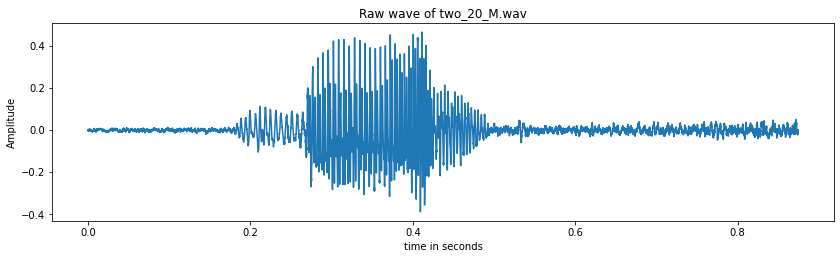

In [ ]:
num = random.randint(0, len(df))
show_file_details(df.File[num], df.Language[num])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['File', 'Gender', 'Language']], df['Digit'], test_size = 0.2,
                                                    stratify=df['Digit'], shuffle = True, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(336, 3)
(84, 3)
(336,)
(84,)
